<div style="background-color: #F2F3F4; padding: 20px; border-radius: 10px;">
    <p style="font-size: 24px; font-family: 'Verdana'; color: #3A405A; text-align: center;">
Welcome to this notebook!</p>
</div>

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9"> Importing libraries </span></b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(


<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">Loading the csv file</span></b>

In [2]:
df=pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">Shape of the Dataset</span></b>

In [4]:
df.shape

(42000, 785)

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">Dataset information</span></b>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">Checking null values</span></b>

In [6]:
df.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">Checking duplicated values</span></b>

In [7]:
df.duplicated().sum()

0

<b><span style="color: #5F5F5F; background-color: #F2F4F2; padding: 20px; font-size: 18px; border-left: 8px solid #A9A9A9">Showing extra statistical measures</span></b>

In [8]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


<div style="background-color: #AAD7D9; #padding: 20px; border-radius: 20px;">
    <p style="font-size: 40px; font-family: 'Verdana'; color: #3A405A; text-align: center;">Data Visualizations</p>
</div>

<b><span style="color: #3C0753; background-color:#AAD7D9; padding: 20px; font-size: 18px; border-left: 8px solid #FF9800">i) Heatmap</span></b>

<Axes: >

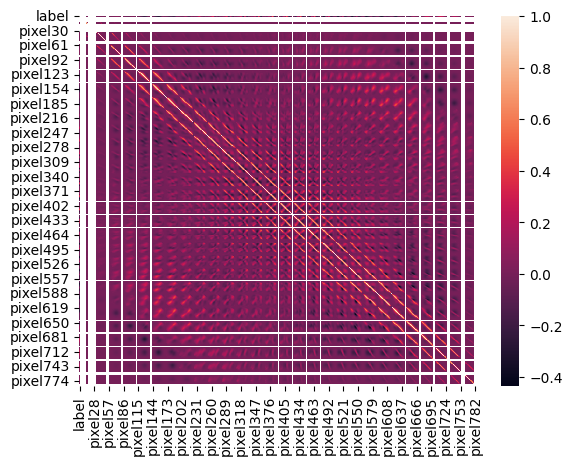

In [9]:
sn.heatmap(df.corr())

<b><span style="color: #3C0753; background-color:#AAD7D9; padding: 20px; font-size: 18px; border-left: 8px solid #FF9800">ii) Countplot</span></b>

In [10]:
df['label'].value_counts()

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

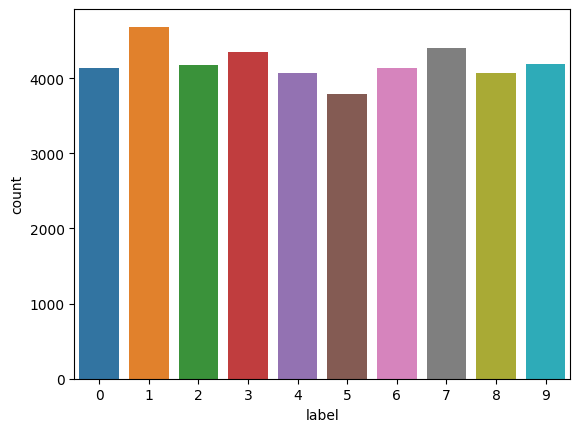

In [11]:
sn.countplot(x=df['label'])

<div style="background-color: #E0AED0; #padding: 20px; border-radius: 20px;">
    <p style="font-size: 40px; font-family: 'Verdana'; color: #3A405A; text-align: center;">Train Test Split</p>
</div>

In [12]:
X=df.drop('label', axis=1)
Y=df['label']

In [13]:
print(X)

       pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0           0       0       0       0       0       0       0       0       0   
1           0       0       0       0       0       0       0       0       0   
2           0       0       0       0       0       0       0       0       0   
3           0       0       0       0       0       0       0       0       0   
4           0       0       0       0       0       0       0       0       0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995       0       0       0       0       0       0       0       0       0   
41996       0       0       0       0       0       0       0       0       0   
41997       0       0       0       0       0       0       0       0       0   
41998       0       0       0       0       0       0       0       0       0   
41999       0       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel77

In [14]:
print(Y)

0        1
1        0
2        1
3        4
4        0
        ..
41995    0
41996    1
41997    7
41998    6
41999    9
Name: label, Length: 42000, dtype: int64


In [15]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [16]:
print(X.shape, X_train.shape, X_test.shape)

(42000, 784) (33600, 784) (8400, 784)


<div style="background-color: #F6B17A; #padding: 20px; border-radius: 20px;">
    <p style="font-size: 40px; font-family: 'Verdana'; color: #3A405A; text-align: center;">Model Training</p>
</div>

<b><span style="color: #3C0753; background-color:#A1EEBD; padding: 20px; font-size: 18px; border-left: 8px solid F037A5">i) Logistic Regression</span></b>

In [17]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### a) Accuracies

In [18]:
print('Training Accuracy: ',lr.score(X_train,Y_train))
print('Testing Accuracy: ',lr.score(X_test,Y_test))

Training Accuracy:  0.940327380952381
Testing Accuracy:  0.9145238095238095


#### b) Confusion Matrix

In [19]:
y_pred=lr.predict(X_test)

pd.DataFrame(confusion_matrix(Y_test,y_pred),columns=list(range(0,10)))

,0,1,2,3,4,5,6,7,8,9
0,791,0,1,0,1,9,11,1,6,1
1,0,938,2,4,0,3,0,3,12,0
2,2,9,745,16,9,4,13,13,15,3
3,1,4,19,763,0,36,5,5,20,11
4,2,5,4,0,804,1,7,3,9,21
5,9,3,4,23,10,610,15,10,34,11
6,12,4,12,1,7,8,789,0,5,1
7,3,2,13,6,4,2,0,812,2,29
8,11,12,13,18,1,21,6,6,694,11
9,3,6,2,14,25,4,0,37,7,736


#### c) Classification Report

In [20]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       821
           1       0.95      0.98      0.96       962
           2       0.91      0.90      0.91       829
           3       0.90      0.88      0.89       864
           4       0.93      0.94      0.94       856
           5       0.87      0.84      0.85       729
           6       0.93      0.94      0.94       839
           7       0.91      0.93      0.92       873
           8       0.86      0.88      0.87       793
           9       0.89      0.88      0.89       834

    accuracy                           0.91      8400
   macro avg       0.91      0.91      0.91      8400
weighted avg       0.91      0.91      0.91      8400



<b><span style="color: #3C0753; background-color:#A1EEBD; padding: 20px; font-size: 18px; border-left: 8px solid F037A5">ii) Random Forest</span></b>

In [21]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

#### a) Accuracies

In [22]:
print('Training Accuracy: ',rf.score(X_train,Y_train))
print('Testing Accuracy: ',rf.score(X_test,Y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.9611904761904762


#### b) Confusion Matrix

In [23]:
y1_pred=rf.predict(X_test)

pd.DataFrame(confusion_matrix(Y_test,y1_pred),columns=list(range(0,10)))

,0,1,2,3,4,5,6,7,8,9
0,811,0,1,0,1,0,2,1,4,1
1,0,947,3,6,0,0,0,2,4,0
2,2,1,796,6,6,0,3,8,5,2
3,0,3,5,823,0,9,4,6,8,6
4,2,0,0,0,828,0,7,0,2,17
5,3,0,2,10,1,695,1,2,10,5
6,8,1,0,0,1,9,818,0,2,0
7,1,4,15,1,5,0,0,832,2,13
8,3,2,4,5,2,8,2,0,753,14
9,5,3,4,10,16,5,0,15,5,771


#### c) Classification report

In [24]:
print(classification_report(Y_test, y1_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       821
           1       0.99      0.98      0.98       962
           2       0.96      0.96      0.96       829
           3       0.96      0.95      0.95       864
           4       0.96      0.97      0.97       856
           5       0.96      0.95      0.96       729
           6       0.98      0.97      0.98       839
           7       0.96      0.95      0.96       873
           8       0.95      0.95      0.95       793
           9       0.93      0.92      0.93       834

    accuracy                           0.96      8400
   macro avg       0.96      0.96      0.96      8400
weighted avg       0.96      0.96      0.96      8400



<b><span style="color: #3C0753; background-color:#A1EEBD; padding: 20px; font-size: 18px; border-left: 8px solid F037A5">iv) XG Boost</span></b>

In [25]:
xgb=XGBClassifier()
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

#### a) Accuracies

In [26]:
print('Training Accuracy: ',xgb.score(X_train,Y_train))
print('Testing Accuracy: ',xgb.score(X_test,Y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.9733333333333334


#### b) Confusion Matrix

In [27]:
y2_pred=xgb.predict(X_test)

pd.DataFrame(confusion_matrix(Y_test,y2_pred),columns=list(range(0,10)))

,0,1,2,3,4,5,6,7,8,9
0,807,0,1,0,2,1,2,0,6,2
1,0,949,0,6,0,2,0,3,2,0
2,1,1,804,6,2,0,3,6,3,3
3,0,2,5,837,1,6,1,4,4,4
4,2,0,0,0,833,0,2,1,1,17
5,0,0,3,8,0,704,4,1,6,3
6,6,1,0,0,3,6,819,0,4,0
7,1,1,11,0,3,0,0,853,1,3
8,3,1,4,2,1,6,3,0,768,5
9,3,2,1,6,6,2,0,11,1,802


#### c) Classification report

In [28]:
print(classification_report(Y_test, y2_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       821
           1       0.99      0.99      0.99       962
           2       0.97      0.97      0.97       829
           3       0.97      0.97      0.97       864
           4       0.98      0.97      0.98       856
           5       0.97      0.97      0.97       729
           6       0.98      0.98      0.98       839
           7       0.97      0.98      0.97       873
           8       0.96      0.97      0.97       793
           9       0.96      0.96      0.96       834

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



<b><span style="color: #3C0753; background-color:#9BB8CD; padding: 20px; font-size: 18px; border-left: 8px solid F037A5">v) Light Gradient Boosting Machine</span></b>

#### LightGBM is a gradient boosting framework that uses tree based learning algorithms.

#### It is designed to be distributed and efficient with the following advantages -->

- **Faster training speed and higher efficiency.**
- **Lower memory usage.**
- **Better accuracy.**
- **Support of parallel, distributed, and GPU learning.**
- **Capable of handling large-scale data.**

In [29]:
lgm= LGBMClassifier()
lgm.fit(X_train,Y_train)

LGBMClassifier()

#### a) Accuracies

In [30]:
print('Training Accuracy: ',lgm.score(X_train,Y_train))
print('Testing Accuracy: ',lgm.score(X_test,Y_test))

Training Accuracy:  1.0
Testing Accuracy:  0.9726190476190476


#### b) Confusion Matrix

In [31]:
y3_pred=lgm.predict(X_test)

pd.DataFrame(confusion_matrix(Y_test,y3_pred),columns=list(range(0,10)))

,0,1,2,3,4,5,6,7,8,9
0,806,0,1,1,1,2,1,1,7,1
1,0,946,2,7,0,0,0,2,5,0
2,1,1,804,7,2,0,1,6,4,3
3,0,1,9,831,0,8,1,4,6,4
4,2,0,0,0,840,0,1,0,1,12
5,0,0,3,7,0,704,2,1,7,5
6,4,1,0,0,1,6,821,0,6,0
7,0,1,8,1,3,0,0,850,3,7
8,2,1,3,2,1,5,0,0,772,7
9,3,2,1,7,8,3,0,12,2,796


#### c) Classification Report

In [32]:
print(classification_report(Y_test, y3_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       821
           1       0.99      0.98      0.99       962
           2       0.97      0.97      0.97       829
           3       0.96      0.96      0.96       864
           4       0.98      0.98      0.98       856
           5       0.97      0.97      0.97       729
           6       0.99      0.98      0.99       839
           7       0.97      0.97      0.97       873
           8       0.95      0.97      0.96       793
           9       0.95      0.95      0.95       834

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



<div style="background-color: #F2F3F4; padding: 20px; border-radius: 10px;">
    <p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; text-align: center;">
Based on the accuracy and performance , we are considering our model as LightGBM.</p>
</div>

-----------------------------------------------------------------------------------------------------------------

<div style="background-color:  #FFF8C9; #padding: 20px; border-radius: 20px;">
    <p style="font-size: 40px; font-family: 'Verdana'; color: #3A405A; text-align: center;">For Kaggle submissions</p>
</div>

In [33]:
test_data=pd.read_csv('/kaggle/input/digit-recognizer/test.csv')

In [34]:
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [35]:
test_data.shape

(28000, 784)

In [36]:
Y_pred=lgm.predict(test_data)

In [37]:
Y_pred

array([2, 0, 9, ..., 3, 9, 2])

<div style="background-color: #F2F3F4; padding: 20px; border-radius: 10px;">
    <p style="font-size: 18px; font-family: 'Verdana'; color: #3A405A; text-align: center;">
Saving the prediction for submission</p>
</div>

<b><span style="color: #3C0753; background-color:#FFF8C9; padding: 20px; font-size: 18px; border-left: 8px solid F037A5">As per format in kaggle submission,we need Id and Y_pred</span></b>

In [38]:
submission = pd.DataFrame({'ImageId': test_data.index + 1, 'Label': Y_pred})
submission.to_csv('submission.csv', index=False)

<b><span style="color: #3C0753; background-color:#FFF8C9; padding: 20px; font-size: 18px; border-left: 8px solid F037A5">Submission csv file</span></b>

In [39]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9
